Data: 2024-08-22, Preco: 61144.68762866613
Data: 2024-08-23, Preco: 60387.54062321362
Data: 2024-08-24, Preco: 64049.68561555576
Data: 2024-08-25, Preco: 64157.1606134782
Data: 2024-08-26, Preco: 64265.81631272862
Data: 2024-08-27, Preco: 62922.58634676265
Data: 2024-08-28, Preco: 59526.560879590994
Data: 2024-08-29, Preco: 59015.29633887944
Data: 2024-08-30, Preco: 59351.5794909728
Data: 2024-08-31, Preco: 59156.246036463555
Data: 2024-09-01, Preco: 58960.23658664587
Data: 2024-09-02, Preco: 57357.71617282246
Data: 2024-09-03, Preco: 59108.73235863689
Data: 2024-09-04, Preco: 57504.538586220435
Data: 2024-09-05, Preco: 57987.84601410068
Data: 2024-09-06, Preco: 56132.404732088595
Data: 2024-09-07, Preco: 53923.35611071905
Data: 2024-09-08, Preco: 54150.9383589072
Data: 2024-09-09, Preco: 54792.40755768575
Data: 2024-09-10, Preco: 57049.118751143265
Data: 2024-09-11, Preco: 57624.16178336144
Data: 2024-09-12, Preco: 57381.764445000474
Data: 2024-09-13, Preco: 58106.951229815284
Data: 2

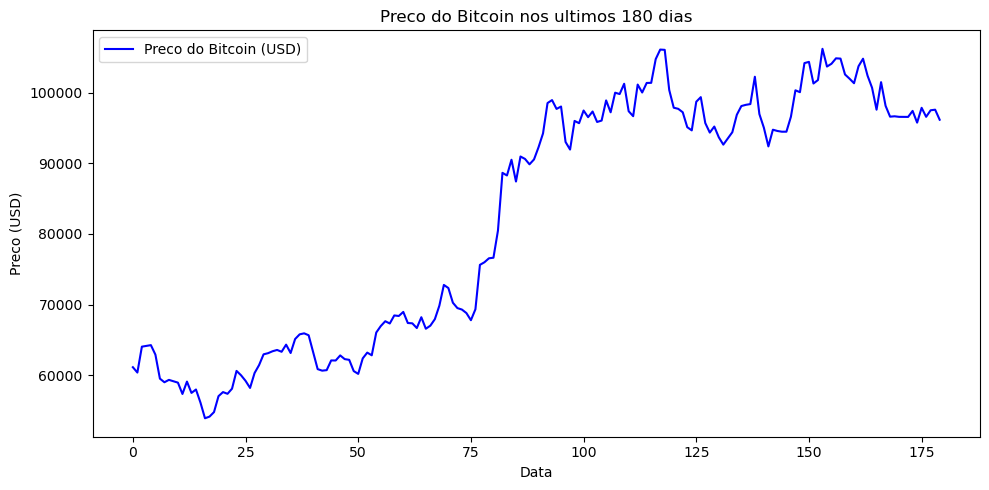

In [1]:
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

to_date = datetime.now()
from_date = to_date - timedelta(days=180)

from_timestamp = int(from_date.timestamp())
to_timestamp = int(to_date.timestamp())

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
params = {
    "vs_currency": "usd",
    "from": from_timestamp,
    "to": to_timestamp
}

try:
    response = requests.get(url, params=params)
    response.raise_for_status()

    data = response.json()
    prices = data.get('prices', [])
    if not prices:
        print("Nenhum dado encontrado no intervalo solicitado.")
    else:
        dates = []
        values = []
        for timestamp, price in prices:
            date = datetime.utcfromtimestamp(timestamp / 1000).strftime('%Y-%m-%d')
            dates.append(date)
            values.append(price)
            print(f"Data: {date}, Preco: {price}")

        print(f"\nTotal de registros: {len(prices)}")

        plt.figure(figsize=(10, 5))
        plt.plot( values, label="Preco do Bitcoin (USD)", color='blue')
        plt.xlabel("Data")
        plt.ylabel("Preco (USD)")
        plt.title("Preco do Bitcoin nos ultimos 180 dias")
        plt.xticks(rotation=0)
        plt.legend()
        plt.tight_layout()
        plt.show()

except requests.RequestException as e:
    print(f"Erro ao fazer a requisicao: {e}")

except Exception as e:
    print(f"Erro ao processar os dados: {e}")
